In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('kaggle_data/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df['Legendary'] = df['Legendary'].astype(int)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


<AxesSubplot:xlabel='HP', ylabel='Attack'>

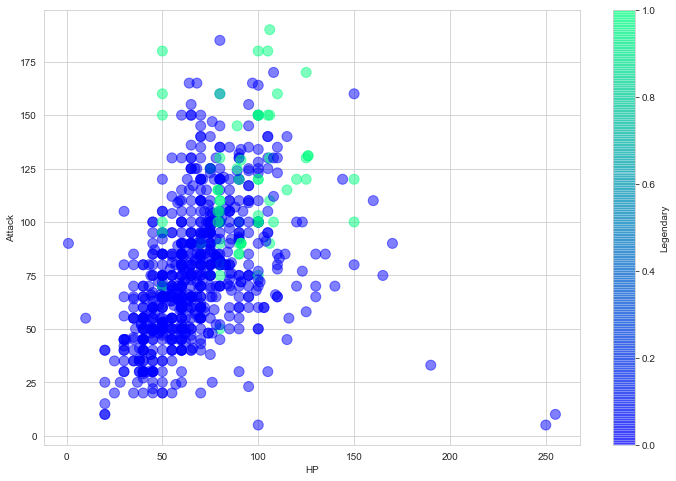

In [4]:
flg, ax = plt.subplots(figsize=(12, 8))
df.plot(kind='scatter', x='HP', y='Attack', s=100, c='Legendary', cmap='winter', alpha=0.5, ax=ax)

In [5]:
df.loc[:, 'HP':'Speed'].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


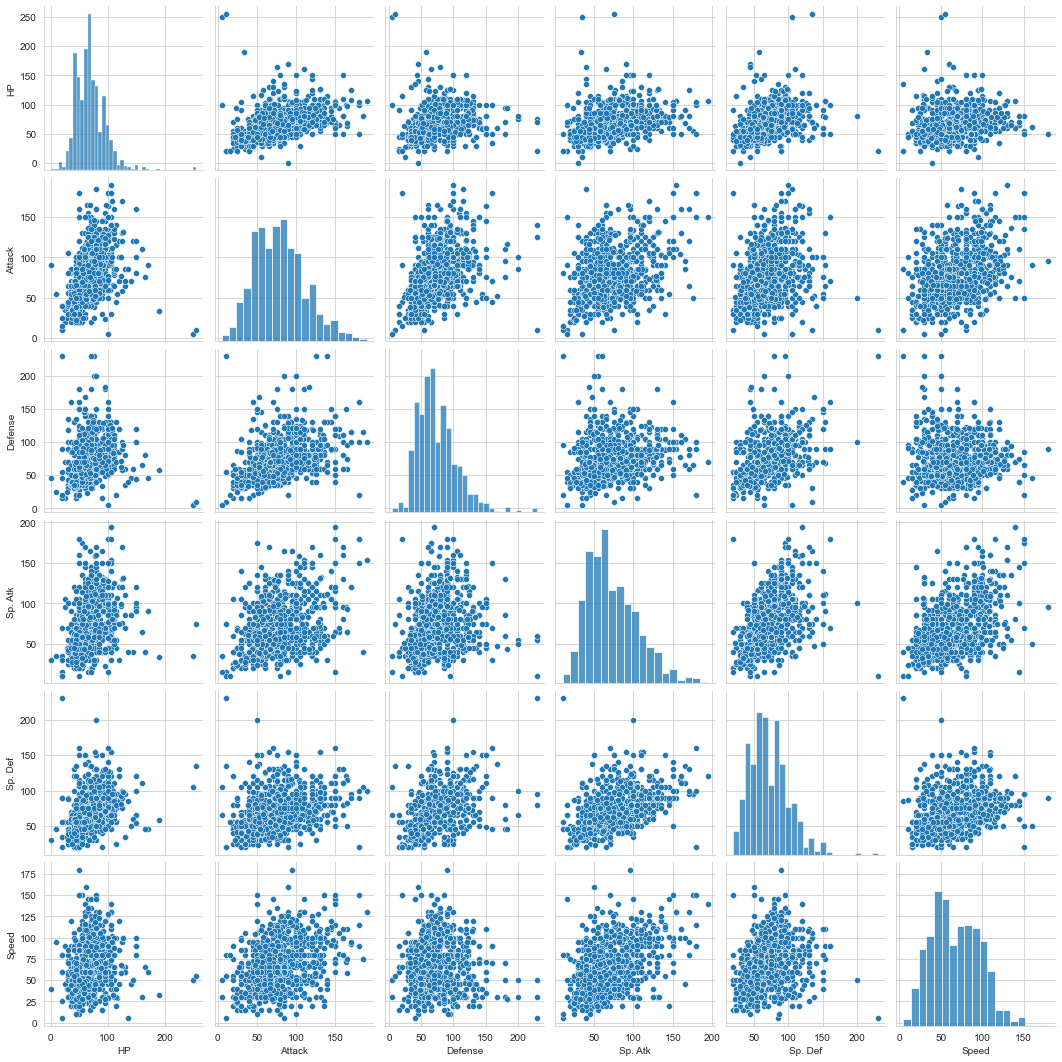

In [6]:
sns.pairplot(df.loc[:, 'HP':'Speed'])

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
X_pca = pca.fit_transform(df.loc[:, 'HP':'Speed'])
df_pca = pd.DataFrame(X_pca, columns=['1st', '2nd', '3rd', '4th', '5th', '6th'])
df_pca.head()

,1st,2nd,3rd,4th,5th,6th
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302


In [9]:
pca.explained_variance_ratio_

array([0.46096131, 0.18752145, 0.13584163, 0.09803479, 0.07378238,
       0.04385843])

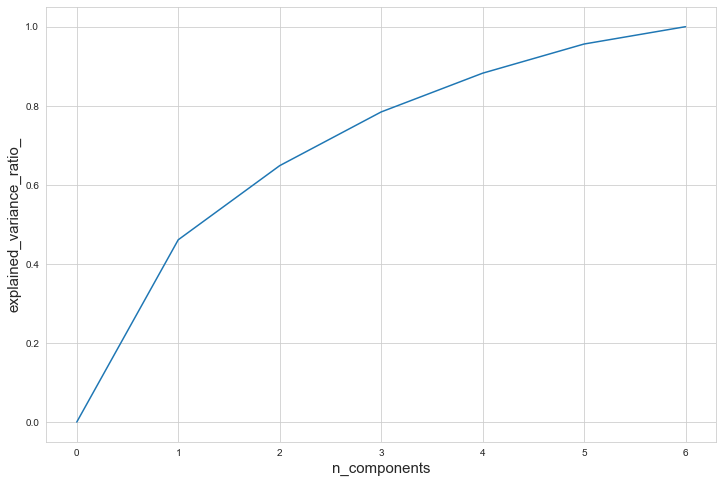

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel('n_components', fontsize=15)
plt.ylabel('explained_variance_ratio_', fontsize=15)
plt.show()

In [11]:
pca.components_

array([[ 0.30080785,  0.49289178,  0.38063453,  0.50898063,  0.39436984,
         0.32726262],
       [ 0.04221029,  0.0765448 ,  0.69521578, -0.38331141,  0.17389431,
        -0.57607928],
       [-0.05898335, -0.73043106,  0.04150427,  0.38478597,  0.54078717,
        -0.14407571],
       [ 0.80159275,  0.02736268, -0.36601146,  0.10099765, -0.04170419,
        -0.45912547],
       [ 0.38716678, -0.1932467 , -0.02643827, -0.64085394,  0.37522525,
         0.51046142],
       [-0.33437231,  0.42376414, -0.48518697, -0.15829258,  0.61583212,
        -0.26250137]])

<AxesSubplot:>

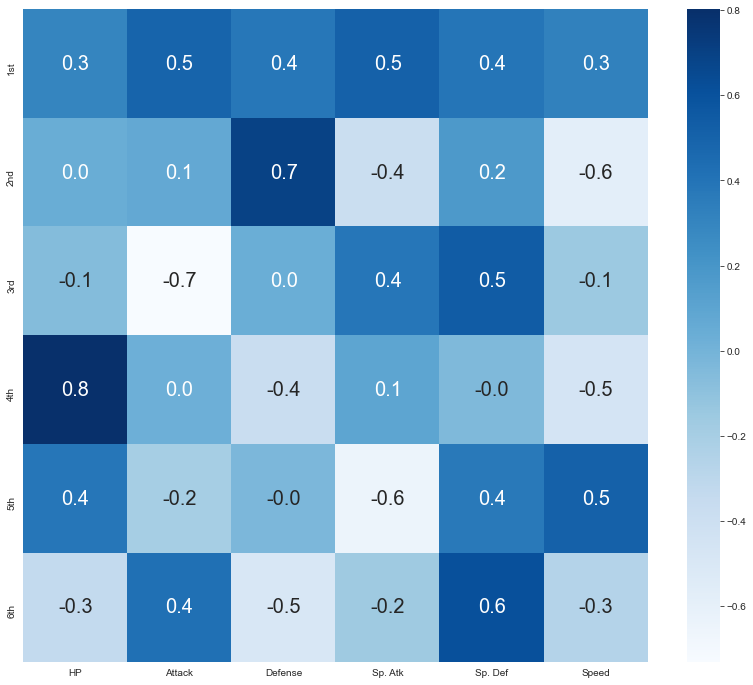

In [12]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    pca.components_, 
    cmap='Blues', 
    annot=True, 
    annot_kws={"size": 20},
    fmt="1.1f",
    xticklabels=df.loc[:, 'HP':'Speed'].columns,
    yticklabels=['1st', '2nd', '3rd', '4th', '5th', '6th']
)

<AxesSubplot:xlabel='1st', ylabel='2nd'>

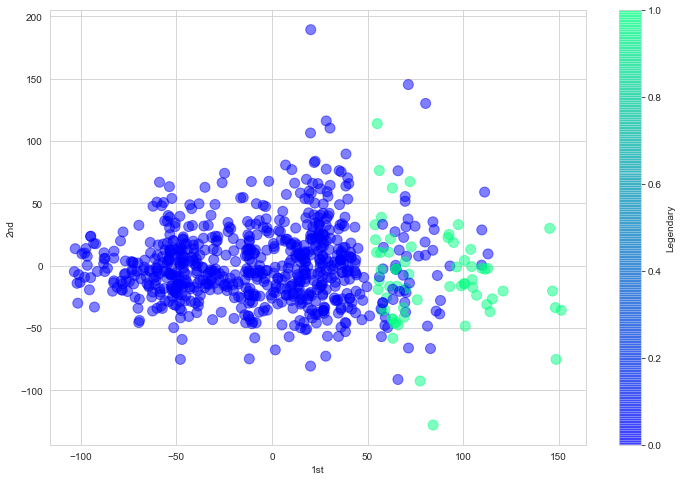

In [13]:
df_pca['Legendary'] = df['Legendary']
flg, ax = plt.subplots(figsize=(12, 8))
df_pca.plot(kind='scatter', x='1st', y='2nd', s=100, c='Legendary', cmap='winter', alpha=0.5, ax=ax)

In [14]:
df = pd.read_csv('kaggle_data/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.shape

(1460, 81)

In [16]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
print('before', df.shape)
df = df.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
print('after', df.shape)

before (1460, 81)
after (1460, 75)


In [18]:
df.dtypes.value_counts()

object     38
int64      35
float64     2
dtype: int64

In [19]:
all_columns = df.columns.values
non_cat_cols = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
    "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
    "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch","PoolArea", "MiscVal"
]
cat_cols = [col for col in all_columns if col not in non_cat_cols]
nan_cols = df.isnull().sum()[df.isnull().sum() > 0].index

for col in nan_cols:
    if col in non_cat_cols:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

X = np.log1p(X)
y = np.log1p(y)

X.shape, y.shape

((1460, 269), (1460,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [23]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.19461875, 0.35051168, 0.46885579, 0.57603289, 0.65608836,
       0.71678929, 0.76573664, 0.80945473, 0.84256947, 0.8662522 ,
       0.88208576, 0.89427683, 0.90494285, 0.91307281, 0.91957688,
       0.92520198, 0.9295564 , 0.93371019, 0.93745334, 0.9408248 ,
       0.94392003, 0.94671182, 0.9494145 , 0.95199414, 0.95442081,
       0.95670184, 0.95890326, 0.9609899 , 0.9628656 , 0.96466628,
       0.9664155 , 0.9680174 , 0.96961861, 0.97112208, 0.97247448,
       0.97369422, 0.97489161, 0.9760238 , 0.97711857, 0.97814919,
       0.97913369, 0.98009887, 0.98101732, 0.98191347, 0.98278779,
       0.98360818, 0.9844056 , 0.98511963, 0.98580822, 0.98645743,
       0.98707933, 0.98767346, 0.98823944, 0.98877369, 0.98927462,
       0.98976715, 0.99024016, 0.99070129, 0.99114474, 0.99158217,
       0.99198364, 0.99236749, 0.99273641, 0.99310126, 0.99344694,
       0.99377742, 0.99409939, 0.99440591, 0.99468492, 0.99495755,
       0.99522618, 0.99547747, 0.99572495, 0.99596339, 0.99618

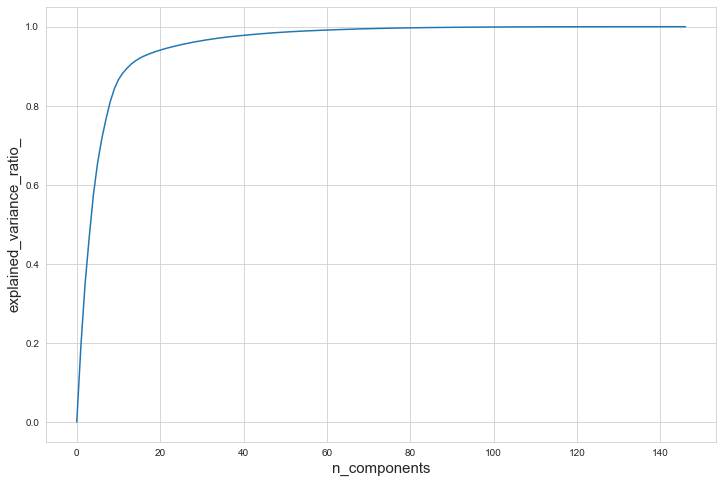

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel('n_components', fontsize=15)
plt.ylabel('explained_variance_ratio_', fontsize=15)
plt.show()

In [26]:
X_train_pca = X_train_pca[:, :8]
X_test_pca = X_test_pca[:, :8]

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [28]:
%%time

cv = KFold(n_splits=5, shuffle=True, random_state=0)
rf_score = np.sqrt(- cross_val_score(
    RandomForestRegressor(n_estimators=500, max_depth=6),
    X=X_train,
    y=y_train,
    cv=cv,
    scoring='neg_mean_squared_error'
))

print(rf_score.mean())

0.15595758481703853
Wall time: 24.8 s


In [29]:
%%time

cv = KFold(n_splits=5, shuffle=True, random_state=0)
rf_pca_score = np.sqrt(- cross_val_score(
    RandomForestRegressor(n_estimators=500, max_depth=6),
    X=X_train_pca,
    y=y_train,
    cv=cv,
    scoring='neg_mean_squared_error'
))

print(rf_pca_score.mean())

0.25710200641356085
Wall time: 8.28 s
